In [124]:
import numpy as np
import matplotlib.pyplot as plt
from collections import namedtuple
import sys
sys.path.append('../..')
from matchedFilters import MatchedFilter
from avoidance_functions import get_activation



class TunnelCenteringBehaviour(object):

    def __init__(self, num_filters=5):
        self.flow = None
        self.num_filters = num_filters
        self.fovx = 120

    def crop_flow(self, flow, crop=0.333):
        # The height of each flow will be the same as the width
        height = flow.shape[1] / (self.num_filters)
            
        if crop:
            flow = flow[: -int(crop * flow.shape[0]), :, :]
            
        return np.array_split(flow, self.num_filters, axis=1)

    def get_matched_filters(self, flows):
        # Needed for the MF functions
        height, width, _ = flows[0].shape
        # FOV of a single filter
        original_fov = self.fovx
        fov = int(original_fov / self.num_filters)
        filter_angles = [30, 0, -30]
        return [MatchedFilter(
            flow.shape[1], flow.shape[0], (fov, fov), 
            axis=[0, 0, filter_angles[i]]
            ).matched_filter for i, flow in enumerate(flows)]
            

    def step(self, flow):
        flows = self.crop_flow(flow, crop=0.333)
        matched_filters = self.get_matched_filters(flows)
        activations = [get_activation(flow, matched_filters[i]) 
                       for i, flow in enumerate(flows)]

        return flows, matched_filters
    
    
def plot(flow):
    """
    Plot the matched filters that have been generated.
    :param show (bool): whether to show the plot in the console or not.
    """
    # Figure that can be displayed
    fig, axis = plt.subplots()
    fovx, fovy = np.deg2rad(120), np.deg2rad(60)
    height, width, _ = flow.shape
    Y = ((np.arange(height, dtype=float) - height / 2.0) / float(
        height)) * np.rad2deg(fovy)

    X = ((np.arange(width, dtype=float) - width / 2.0) / float(
        width)) * np.rad2deg(fovx)

    U = flow[:, :, 0]
    V = flow[:, :, 1]
    step_size = 2
    scale = None
    axis.set_xlabel('x (degrees)')
    axis.set_ylabel('y (degrees)')
    axis.quiver(X[::step_size], Y[::step_size],
                U[::step_size, ::step_size],
                V[::step_size, ::step_size],
                pivot='mid', scale=scale)

    
    
#flow = np.ones((40, 135, 1))
m = np.linspace(0, 39, 40).T
flow = np.tile(m, (135, 1)).T
flow = flow[:, :, None]
tcb = TunnelCenteringBehaviour(num_filters=3)
        

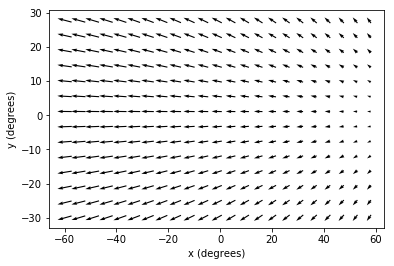

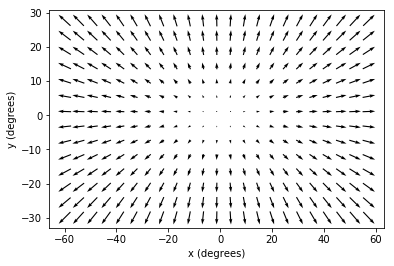

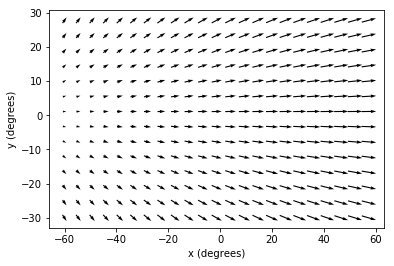

In [125]:
flows, matched_filters = tcb.step(flow)
for mf in matched_filters:
    plot(mf)

In [126]:
flows[0][0, :, 0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])